## YOLO (You Only Look Once)

YOLOv3 has 53 convolutional layers called **Darknet-53** as you can see in the following figure.

![Darknet-53 Architecture](https://machinelearningspace.com/wp-content/uploads/2020/01/yolo_structure2.png)


The YOLOv3 network divides an input image into **S x S** grid of cells and predicts bounding boxes as well as class probabilities for each grid. Each grid cell is responsible for predicting **B** bounding boxes and **C** class probabilities of objects whose centers fall inside the grid cell. Bounding boxes are the regions of interest **(ROI)** of the candidate objects.

* The “**B**” is associated with the number of **using anchors**. Each bounding box has **(5 + C)** attributes. The value of “5” is related to **5 bounding box attributes**, those are **center coordinates (bx, by)** and **shape (bh, bw)** of the bounding box, and one **confidence score**.

* The “**C**” is the number of **classes**. The **confidence score** reflects how confidence a box contains an object. The confidence score is in the range of **0 - 1**. (**Non-Maximum Suppression** (**NMS**)).

Since we have S x S grid of cells, after running a single forward pass convolutional neural network to the whole image, YOLOv3 produces a **3-D tensor** with the shape of **S, S, (B x (5 + C))**.

The following figure illustrates the basic principle of YOLOv3 where the input image is divided into the **13 x 13** grid of cells.

![Illustration](https://machinelearningspace.com/wp-content/uploads/2020/01/bbox_ok-2.png)

YOLOv3 was trained on the **COCO** dataset with **C=80** and **B=3**. So, for the first prediction scale, after a single forward pass of CNN, the YOLOv3 outputs a tensor with the shape of **[(13, 13, 3 * (5 + 80)]**.














### Anchor Box Algorithm

One grid cell can detect only one object whose mid-point of the object falls inside the cell but in some cases grid cell contains more than one mid-point of the objects (object overlapping). In order to overcome this condition, YOLOv3 uses 3 different anchor boxes for every detection scale.

Anchors are a set of **predefined bounding box shapes** that are used to predict the location and size of objects within an image. They calculated on the COCO dataset using K-Means clustering. Anchors provide a priori information about the expected sizes and aspect ratios of objects in the image. They act as **reference templates** for the network to make predictions. The anchor boxes are defined based on the dataset being used for training. Typically, the anchor boxes are chosen to represent **different object sizes** and **aspect ratios** commonly found in the dataset.

During **training**, the network **adjusts the anchor boxes** to better fit the objects in the training images. The network **predicts offsets** from the anchor boxes to adjust their positions and sizes to match the **ground truth bounding boxes**.

The use of anchors in YOLO helps in handling objects of various sizes and shapes by providing a set of predefined reference boxes. This allows the algorithm to efficiently detect and classify objects in real-time, making it popular for object detection tasks.

While there are 3 predictions across scale, so the total anchor boxes are 9, they are: (10x13), (16x30), (33x23) for the first scale, (30x61), (62x45), (59x119) for the second scale, and (116x90), (156x198), (373x326) for the third scale.

* by = σ(ty)+cy

* bw = pwetw

* bh = pheth

Where **bx** and **by** are the **center coordinates** of the box, **bw** and **bh** are the **width** and **height** of the box, **cx** and **cy** are the location of filter application and ti are predicted during regression.

https://www.youtube.com/watch?v=RTlwl2bv0Tg

### Prediciton Across Scale

YOLOv3 makes detection in 3 different scales in order to accommodate different objects size by using **strides** of **32**, **16** and **8**. This means, if we feed an input image of size **416 x 416**, YOLOv3 will make detection on the scale of **13 x 13**, **26 x 26**, and **52 x 52**.

For the first scale, YOLOv3 **downsamples** the input image into 13 x 13 and makes a prediction at the **82nd layer**. The 1st detection scale yields a 3-D tensor of size **13 x 13 x 255**. After that, YOLOv3 takes the feature map from **layer 79** and applies one convolutional layer before **upsampling** it by a **factor of 2** to have a size of **26 x 26**. This upsampled feature map is then **concatenated** with the feature map from **layer 61**. The concatenated feature map is then subjected to a few more convolutional layers until the **2nd detection scale** is performed at layer **94**. The second prediction scale produces a 3-D tensor of size **26 x 26 x 255**. The same design is again performed one more time to predict the 3rd scale. The feature map from layer 91 is added one convolutional layer and is then concatenated with a feature map from layer 36. The final prediction layer is done at layer 106 yielding a 3-D tensor of size 52 x 52 x 255.

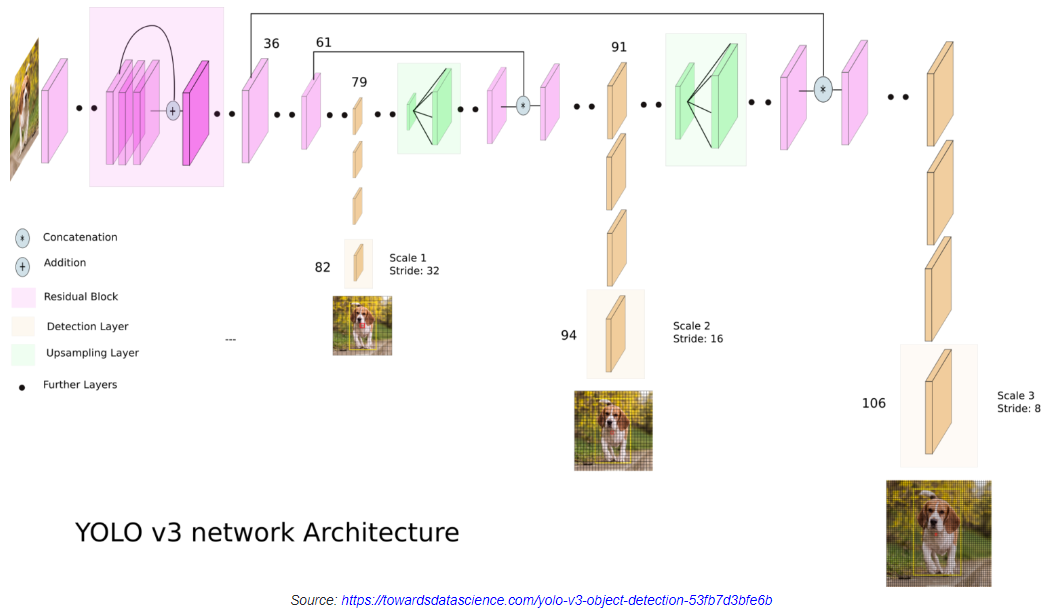

https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b


Once again, YOLOv3 predicts over 3 different scales detection, so if we feed an image of size 416x 416, it produces 3 different output shape tensor, 13 x 13 x 255, 26 x 26 x 255, and 52 x 52 x 255.


### Bounding Box Prediction

For each bounding box, YOLO predicts 4 coordinates, tx, ty, tw, th. The tx and ty are the bounding box’s center coordinate relative to the grid cell whose center falls inside, and the tw and th are the bounding box’s shape, width and height, respectively.

The final output of the bounding box predictions:

![bounding_box_predictions](https://machinelearningspace.com/wp-content/uploads/2019/12/yolo_eq1-300x246.png)


The pw and ph are the anchor’s width and height, respectively.

![bounding_box_anchor](https://machinelearningspace.com/wp-content/uploads/2019/12/yolo-regression.png)

The YOLO algorithm returns bounding boxes in the form of **(bx, by, bw, bh)**. The bx and by are the center coordinates of the boxes and bw and bh are the box shape **(width and height)**. Generally, to draw boxes, we use the **top-left coordinate (x1, y1)** and the box shape (width and height). To do this just simply convert them using this simple relation:

![](https://machinelearningspace.com/wp-content/uploads/2019/12/bbox_formula2.png)

![](https://machinelearningspace.com/wp-content/uploads/2019/12/bbox-1-300x189.png)






### Total Class Prediction

COCO dataset has 80 different classes. If we split an image into a 13 x 13 grid of cells and use 3 anchors box, the total output prediction is 13 x 13 x 3 or 169 x 3. However, YOLOv3 uses 3 different prediction scales which splits an image into (13 x 13), (26 x 26) and (52 x 52) grid of cells and with 3 anchors for each scale. So, the total output prediction will be ([(13 x 13) + (26 x 26) + (52 x 52)] x 3) = 10,647.

### Non-maximum Suppression

The non-maximum suppression (NMS) method is used to decide a bounding box for a situation with multiple bounding boxes for the same object. Basically, what NMS does is to clean up these detections. The first step of NMS is to suppress all the predictions boxes where the **confidence score** is**under** a certain **threshold** value. Let’s say the confidence threshold is set to 0.5, so every bounding box where the confidence score is less than or equal to 0.5 will be discarded.

As a second step of NMS,  the rest of the higher confidence scores are sorted from the highest to the lowest one, then highlight the bounding box with the **highest** score as the **proper bounding box**, and after that find all the other bounding boxes that have a **high IOU** (intersection over union) with this highlighted box. Let’s say we’ve set the IOU threshold to 0.5, so every bounding box that has IOU greater than 0.5 must be removed because it has a high IOU that corresponds to the same highlighted object. This method allows us to **output only one proper bounding box** for a detected object. Repeat this process for the remaining bounding boxes and always highlight the highest score as an appropriate bounding box. Do the same step until all bounding boxes are selected properly.

* YOLO applies a single neural network to the whole image and predicts the bounding boxes and class probabilities as well. This makes YOLO a super-fast real-time object detection algorithm.
* YOLO divides an image into SxS grid cells. Every cell is responsible for detecting an object whose center falls inside.
* To overcome the overlapping objects whose centers fall in the same grid cell, YOLOv3 uses anchor boxes.
* To facilitate the prediction across scale, YOLOv3 uses three different numbers of grid cell sizes (13×13), (26×26), and (52×52).
* A Non-Max Suppression is used to eliminate the overlapping boxes and keep only the accurate one.

### Batch Normalization

It is a preprocessing step of features extracted from previous layers, before feeding it to the next layers of the network. We normalize the input layer by adjusting and scaling the activations. This allows each layer of a network to learn by itself a little bit more independently of other layers.

Almost every convolutional layer in Yolo has **batch normalization** after it. It helps the model **train faster** and **reduces variance** between units.

![Batch_normalization](https://raw.githubusercontent.com/shahkaran76/yolo_v3-tensorflow-ipynb/7472f58be09ba36094eb0b94a5406e83bb2e5386//images/batch%20norm.png)

### Leaky ReLU

![Leaky_Relu](https://raw.githubusercontent.com/shahkaran76/yolo_v3-tensorflow-ipynb/7472f58be09ba36094eb0b94a5406e83bb2e5386//images/prelu.jpg)

Suppose if, for whatever reason, the output of a ReLU is consistently 0 (for example, if the ReLU has a large negative bias), then the gradient through it will consistently be 0. The error signal backpropagated from later layers gets multiplied by this 0, so no error signal ever passes to earlier layers. In situations like that the Leaky ReLU is used.



YOLOv3 has 2 important files: **yolov3.cfg** and **yolov3.weights**.
* The file **yolov3.cfg** contains all information related to the YOLOv3 architecture and its parameters
* The file **yolov3.weights** contains the convolutional neural network (CNN) parameters of the YOLOv3 pre-trained weights.

#### Creating a Project Directory and Files

Create folder with name PROJECTS, create a directory named YOLOv3_TF2 in PROJECTS. This is the directory where we’ll be working. Now, under the YOLOv3_TF2 directory, let’s create 4 subdirectories, namely: img, cfg, data,and weights. And still under PROJECTS, now create 5 python files, they are:

* yolov3.py
* convert_weights.py
* utils.py
* image.py
* video.py


https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg

https://github.com/pjreddie/darknet/blob/master/data/coco.names

https://github.com/RahmadSadli/Deep-Learning/blob/master/YOLOv3_TF2/yolov3.py




#### Converting the Weight parameters from the file yolov3.weights into the TF2

![](https://machinelearningspace.com/wp-content/uploads/2020/01/weights.jpg)

When we re-write these weights to TensorFlow’s format for a convolutional with a batch normalization layer, we need to switch the position of beta and gamma. So, they’re ordered like this: beta, gamma, means, variance, and conv weights. However, the weights’ order remains the same for the convolutional without a batch normalization layer.

https://machinelearningspace.com/yolov3-tensorflow-2-part-3/


In [ ]:
! python /content/drive/MyDrive/MASTER/Master_Thesis/YOLO/PROJECTS/convert_weights.py

2023-07-21 12:12:11.330898: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 12:12:12.687078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-21 12:12:14.921934: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-21 12:12:14.952861: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Those created files are in the TensorFlow 2.0 weights format. So, anytime we want to use them, just simply call them like the only one file, yolov3_weights.tf

In [ ]:
! python /content/drive/MyDrive/MASTER/Master_Thesis/YOLO/PROJECTS/image.py

2023-07-26 05:49:06.569575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 05:49:07.564260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-26 05:49:09.389034: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-26 05:49:09.420886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

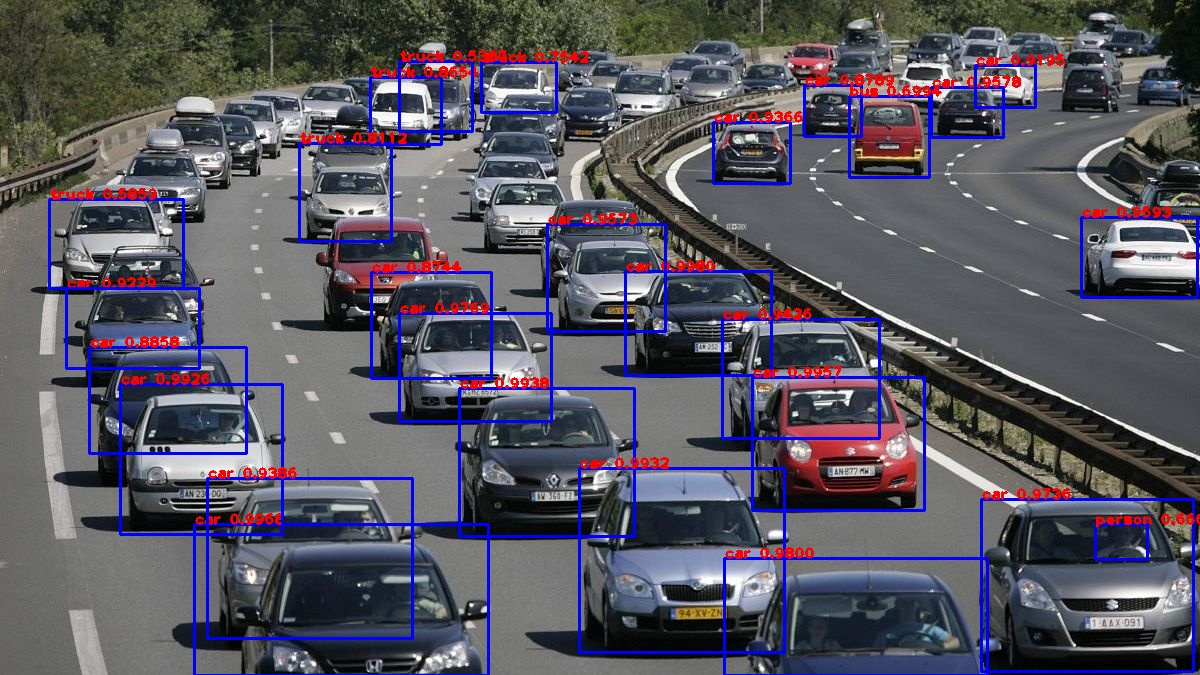

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_path = "/content/test.jpg"

image = cv2.imread(img_path)

cv2_imshow(image)

#### Reference

https://machinelearningspace.com/yolov3-tensorflow-2-part-1/

https://machinelearningspace.com/yolov3-tensorflow-2-part-2/

https://machinelearningspace.com/yolov3-tensorflow-2-part-3/

https://github.com/shahkaran76/yolo_v3-tensorflow-ipynb/blob/master/YOLO%20Tensorflow.ipynb

https://medium.com/analytics-vidhya/yolov3-object-detection-in-tensorflow-2-x-8a1a104c46a8

https://medium.com/@shahkaran76/yolo-object-detection-algorithm-in-tensorflow-e080a58fa79b

https://www.kaggle.com/code/aruchomu/yolo-v3-object-detection-in-tensorflow

https://ecevit2804.medium.com/yolo-v5-algoritmas%C4%B1-ile-nesne-tespit-e%C4%9Fitimi-5c063fa0df70

https://www.google.com/search?q=training+yolo+v8&rlz=1C1GCEB_enTR910TR910&oq=Training+YOLO+v&aqs=chrome.1.69i57j0i19i512l4j0i10i19i22i30j0i19i22i30l4.5694j0j7&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:0e57d5df,vid:iy34dSwfEsY